In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('credit_score.csv')
df

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CZQHJC9HDH,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,...,0.2041,0.0543,High,1,1,1,1,1,418,0
996,CZRA4MLB0P,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,...,0.8333,0.1087,No,1,0,0,1,0,589,1
997,CZSOD1KVFX,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,...,0.2500,0.3448,No,1,0,0,1,0,499,0
998,CZWC76UAUT,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,...,5.0002,0.0662,No,1,1,0,1,0,507,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [4]:
def contains_binary(series):
    unique_values = series.unique()  # array
    return set(unique_values).issubset({0, 1})

In [5]:
binary_cols = [i for i in df.columns if contains_binary(df[i])]
binary_cols

['CAT_DEBT',
 'CAT_CREDIT_CARD',
 'CAT_MORTGAGE',
 'CAT_SAVINGS_ACCOUNT',
 'CAT_DEPENDENTS',
 'DEFAULT']

In [6]:
object_cols = [i for i in df.columns if df[i].dtype == 'object']
object_cols

['CUST_ID', 'CAT_GAMBLING']

In [7]:
cols_to_drop = binary_cols + object_cols + ['CREDIT_SCORE']  # target

In [8]:
new_df = df.drop(columns=cols_to_drop, axis=1, inplace=False)
new_df.shape

(1000, 78)

In [9]:
arr_scaled = StandardScaler().fit_transform(new_df)
df_scaled = pd.DataFrame(arr_scaled, columns=new_df.columns)
df_scaled.describe()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_UTILITIES,R_UTILITIES_INCOME,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.552714e-18,-2.842171e-17,-2.664535e-17,-8.171241e-17,2.842171e-17,5.329071e-18,2.486900e-17,-1.953993e-17,1.261213e-16,-2.664535e-17,...,-4.584777e-15,-7.993606e-17,-9.148238e-17,2.131628e-17,7.815970e-17,-3.907985e-17,-1.185718e-16,-7.105427e-16,2.131628e-17,-2.664535e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.069947e+00,-9.333515e-01,-8.057868e-01,-1.024549e+00,-1.038237e+00,-3.496583e-01,-9.117832e-01,-6.774943e-01,-1.927990e+00,-1.389019e+00,...,-4.675935e+00,-2.118461e+00,-6.294774e-01,-4.560322e-01,-1.156361e+00,-1.076236e+00,-4.211537e+00,-1.639430e+00,-5.622405e-01,-4.660516e-01
25%,-8.020404e-01,-7.984509e-01,-7.507916e-01,-7.724131e-01,-7.893903e-01,-3.373698e-01,-7.668446e-01,-6.150478e-01,-8.091699e-01,-6.886135e-01,...,-6.387384e-01,-6.416818e-01,-4.570910e-01,-3.875735e-01,-8.308235e-01,-7.722263e-01,-5.380773e-01,-6.530718e-01,-4.645469e-01,-3.890534e-01
50%,-3.213098e-01,-3.147522e-01,-4.031619e-01,-3.827494e-01,-1.979313e-01,-2.304685e-01,-3.111803e-01,-4.226267e-01,5.935150e-02,-2.332165e-01,...,-4.661617e-02,-8.159107e-02,-2.657611e-01,-3.303171e-01,-2.655869e-01,-2.679116e-01,9.209778e-02,-2.042964e-01,-3.603587e-01,-3.285328e-01
75%,5.244375e-01,4.722679e-01,4.101826e-01,5.656983e-01,4.309745e-01,-8.090916e-02,4.445181e-01,2.128809e-01,7.267438e-01,3.686532e-01,...,5.993354e-01,5.724941e-01,4.917558e-02,-2.598693e-02,5.716480e-01,4.858863e-01,6.096631e-01,3.338788e-01,-4.927178e-02,-1.314821e-02
max,4.755277e+00,5.644238e+00,5.276577e+00,3.037666e+00,5.292113e+00,1.710224e+01,4.869053e+00,7.124502e+00,2.557887e+00,5.223558e+00,...,9.588827e+00,3.943698e+00,1.238475e+01,1.186903e+01,4.131953e+00,4.670758e+00,2.887578e+00,6.255582e+00,5.599725e+00,7.237849e+00


# Transpose dataframe

In [10]:
df_transposed = df_scaled.transpose()
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
INCOME,-0.777240,-0.391097,-0.797934,-0.360312,0.249525,0.528120,-0.534305,0.873026,-0.378278,0.460937,...,2.350998,-0.154998,-0.720668,0.627988,-0.904277,1.823705,-0.353740,-1.069947,-0.753116,-0.680487
SAVINGS,-0.933351,-0.727370,-0.884465,-0.787594,1.715197,-0.167462,-0.837084,-0.511248,-0.791285,2.461154,...,0.091346,-0.762509,-0.036593,0.853992,-0.928034,2.376077,-0.732750,-0.837511,-0.915276,-0.233413
DEBT,-0.263339,-0.484123,-0.260730,-0.164673,1.639472,0.921794,-0.414927,1.461984,-0.693628,-0.386676,...,1.538597,0.051645,-0.801741,0.590533,-0.405228,4.800526,-0.111975,-0.774441,-0.190092,-0.760677
R_SAVINGS_INCOME,-1.024549,-0.726575,-0.848054,-0.822840,0.946701,-0.553887,-0.848054,-0.811192,-0.822840,1.152999,...,-0.730382,-0.841171,1.496812,0.009209,-0.993032,0.098616,-0.749494,-0.208158,-0.968525,0.740378
R_DEBT_INCOME,1.699167,-0.338334,1.921581,0.296247,1.699167,0.558593,0.039616,0.685797,-0.798715,-0.633854,...,-0.025962,0.346017,-1.021129,0.176486,2.533151,1.823599,0.392689,0.362783,1.832222,-0.867150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_EXPENDITURE_6,-0.701635,-0.584675,-0.735109,-0.281819,0.170949,0.006306,-0.402432,-0.083722,-0.264440,0.239965,...,3.203159,-0.314471,-0.710425,0.994767,-0.830215,2.027137,-0.457119,-0.930578,-0.566593,-0.620819
R_EXPENDITURE,0.842411,-1.939268,0.718195,-0.176409,-0.654451,-0.777412,0.616564,-2.732241,0.123465,-1.180172,...,1.849938,-1.310661,-0.473774,0.317944,0.434632,0.084570,-1.096107,2.887578,1.726977,-0.483811
R_EXPENDITURE_INCOME,0.333879,-0.204296,0.333879,0.333879,-0.204296,-1.639430,0.333879,-1.032577,0.333879,-0.204296,...,-0.653072,-0.204296,0.333879,0.333879,1.814009,-0.204296,-0.204296,0.729369,0.991649,0.991649
R_EXPENDITURE_SAVINGS,-0.562241,-0.088731,0.317187,0.207243,-0.490648,-0.342414,0.317187,-0.002610,0.207243,-0.497419,...,-0.122527,0.207243,-0.500682,-0.412099,5.592831,-0.436599,-0.049272,-0.408344,2.515818,-0.464547


In [11]:
df_transposed.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,-0.246156,-0.342837,-0.193422,-0.055626,-0.084339,-0.088521,0.055955,-0.093966,0.175422,0.001061,...,0.562990,-0.069863,0.575288,0.114913,0.474297,0.397264,-0.271936,-0.313391,0.167512,-0.175028
std,0.662427,0.546378,0.795629,0.644457,0.682594,0.656399,1.100808,1.051869,1.062182,0.859903,...,1.234375,0.792197,2.400230,0.829205,2.289715,1.215055,0.541718,1.236948,1.250865,0.688706
min,-1.314121,-1.939268,-4.338050,-2.661335,-1.266521,-2.743406,-1.741485,-4.547587,-1.436760,-2.386261,...,-1.533158,-1.633701,-1.234237,-1.360528,-1.318689,-1.555002,-1.849854,-8.675232,-1.314121,-1.285456
25%,-0.654097,-0.616646,-0.633453,-0.352919,-0.471689,-0.368331,-0.519764,-0.504305,-0.416950,-0.452696,...,-0.269031,-0.521818,-0.549510,-0.381096,-0.640734,-0.355990,-0.561165,-0.720414,-0.582296,-0.542656
50%,-0.396571,-0.330159,-0.299340,-0.122282,-0.225934,-0.150397,-0.282696,-0.237807,-0.144373,-0.201494,...,-0.005069,-0.199515,-0.330902,-0.192202,-0.369450,-0.126282,-0.324216,-0.394464,-0.323465,-0.369507
75%,-0.134832,-0.108430,0.329706,0.172277,0.047360,0.377137,0.176733,0.484454,0.461112,0.105004,...,1.372389,0.198159,0.281751,0.495579,0.309346,0.960424,-0.120777,-0.120777,0.422863,-0.017722
max,2.107472,1.075373,1.921581,2.383117,1.762034,1.090587,5.475463,2.237919,5.787817,2.461154,...,4.855321,3.242182,8.304195,2.925579,9.601426,4.800526,1.462308,2.887578,4.739680,3.388918


# Perform agglomerative clustering to group similar features

In [12]:
agglomerative_clustering = linkage(df_transposed, metric='euclidean', method='ward')
agglomerative_clustering.shape

(77, 4)

In [13]:
df_linkage = pd.DataFrame(agglomerative_clustering, columns=['Cluster 1', 'Cluster 2', 'Distance', 'Num of Observations in a Cluster'])
df_linkage

,Cluster 1,Cluster 2,Distance,Num of Observations in a Cluster
0,48.0,49.0,0.001115,2.0
1,12.0,13.0,0.110213,2.0
2,66.0,67.0,0.140091,2.0
3,54.0,55.0,2.917148,2.0
4,30.0,31.0,3.256809,2.0
...,...,...,...,...
72,122.0,148.0,75.656756,27.0
73,149.0,150.0,78.869084,37.0
74,147.0,151.0,94.191948,50.0
75,131.0,152.0,110.227104,59.0


In [14]:
df_transposed.index[48], df_transposed.index[49]

('T_HOUSING_12', 'T_HOUSING_6')

**Looking at the first step, clusters 48 and 49 correspond to the features `T_HOUSING_12` and `T_HOUSING_6`. These are grouped to form cluster 78. Clusters 48 and 49 are removed**

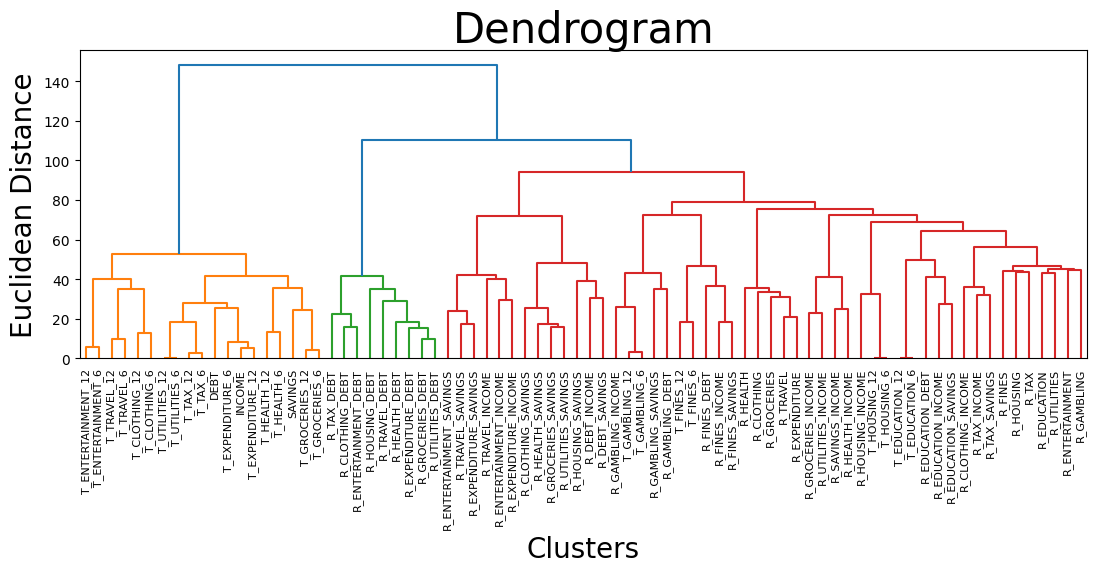

In [15]:
plt.figure(figsize=(13,4))
dendrogram(agglomerative_clustering, labels=df_transposed.index, distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram', fontsize=30)
plt.xlabel('Clusters', fontsize=20)
plt.ylabel('Euclidean Distance', fontsize=20)
plt.xticks(fontsize=8)
plt.show()

In [16]:
max_clusters = 12
max_distance = 60
labels = fcluster(agglomerative_clustering, t=max_distance, criterion='distance')
labels.shape, labels

((78,),
 array([ 1,  1,  1,  8,  4,  4,  1,  1,  7, 11,  4,  2, 10, 10, 11, 10, 10,
        10,  1,  1, 11,  3,  3,  2,  6,  6, 11,  6,  6,  6,  5,  5, 11,  5,
         5,  5,  1,  1,  7,  8,  4,  2,  1,  1,  7,  8,  4,  2,  9,  9, 11,
         9,  4,  2,  1,  1, 11, 11, 11,  2,  1,  1,  7,  3,  3,  2,  1,  1,
        11,  8,  4,  2,  1,  1,  7,  3,  3,  2], dtype=int32))

# Check correlations between features of each cluster

In [17]:
correlations = []
for col in new_df.columns:
    corr = df['CREDIT_SCORE'].corr(new_df[col])  # Find correlations between features and target (CREDIT_SCORE)
    corr = round(corr, 3) 
    correlations.append(corr)

In [18]:
len(correlations)

78

In [19]:
values = list(zip(new_df.columns, labels, correlations))
df_corr = pd.DataFrame(values, columns=['Feature', 'Cluster', 'Correlation'])
df_corr['Abs_Correlation'] = df_corr['Correlation'].abs()

df_corr.sort_values(by=['Cluster', 'Abs_Correlation'], ascending=[True, False], inplace=True)
df_corr.reset_index(drop=True, inplace=True)
df_corr

,Feature,Cluster,Correlation,Abs_Correlation
0,DEBT,1,-0.327,0.327
1,T_ENTERTAINMENT_12,1,0.109,0.109
2,T_ENTERTAINMENT_6,1,0.084,0.084
3,T_GROCERIES_6,1,-0.081,0.081
4,SAVINGS,1,0.079,0.079
...,...,...,...,...
73,R_TAX_SAVINGS,11,0.036,0.036
74,R_GAMBLING,11,-0.023,0.023
75,R_UTILITIES,11,-0.019,0.019
76,R_TAX_INCOME,11,0.007,0.007


In [20]:
df_corr.Cluster.value_counts()

Cluster
1     19
11    10
2      9
4      7
3      6
5      5
6      5
7      5
10     5
8      4
9      3
Name: count, dtype: int64

In [21]:
c1_features = df_corr[df_corr['Cluster']==1]['Feature'].tolist()
c2_features = df_corr[df_corr['Cluster']==2]['Feature'].tolist()
c3_features = df_corr[df_corr['Cluster']==3]['Feature'].tolist()
c1_features

['DEBT',
 'T_ENTERTAINMENT_12',
 'T_ENTERTAINMENT_6',
 'T_GROCERIES_6',
 'SAVINGS',
 'T_GROCERIES_12',
 'T_HEALTH_12',
 'T_TAX_12',
 'T_TAX_6',
 'INCOME',
 'T_TRAVEL_12',
 'T_CLOTHING_6',
 'T_TRAVEL_6',
 'T_EXPENDITURE_12',
 'T_EXPENDITURE_6',
 'T_HEALTH_6',
 'T_UTILITIES_12',
 'T_UTILITIES_6',
 'T_CLOTHING_12']

Text(0.5, 1.0, 'Correlations between Features in Cluster 1, Cluster 2 and Cluster 3')

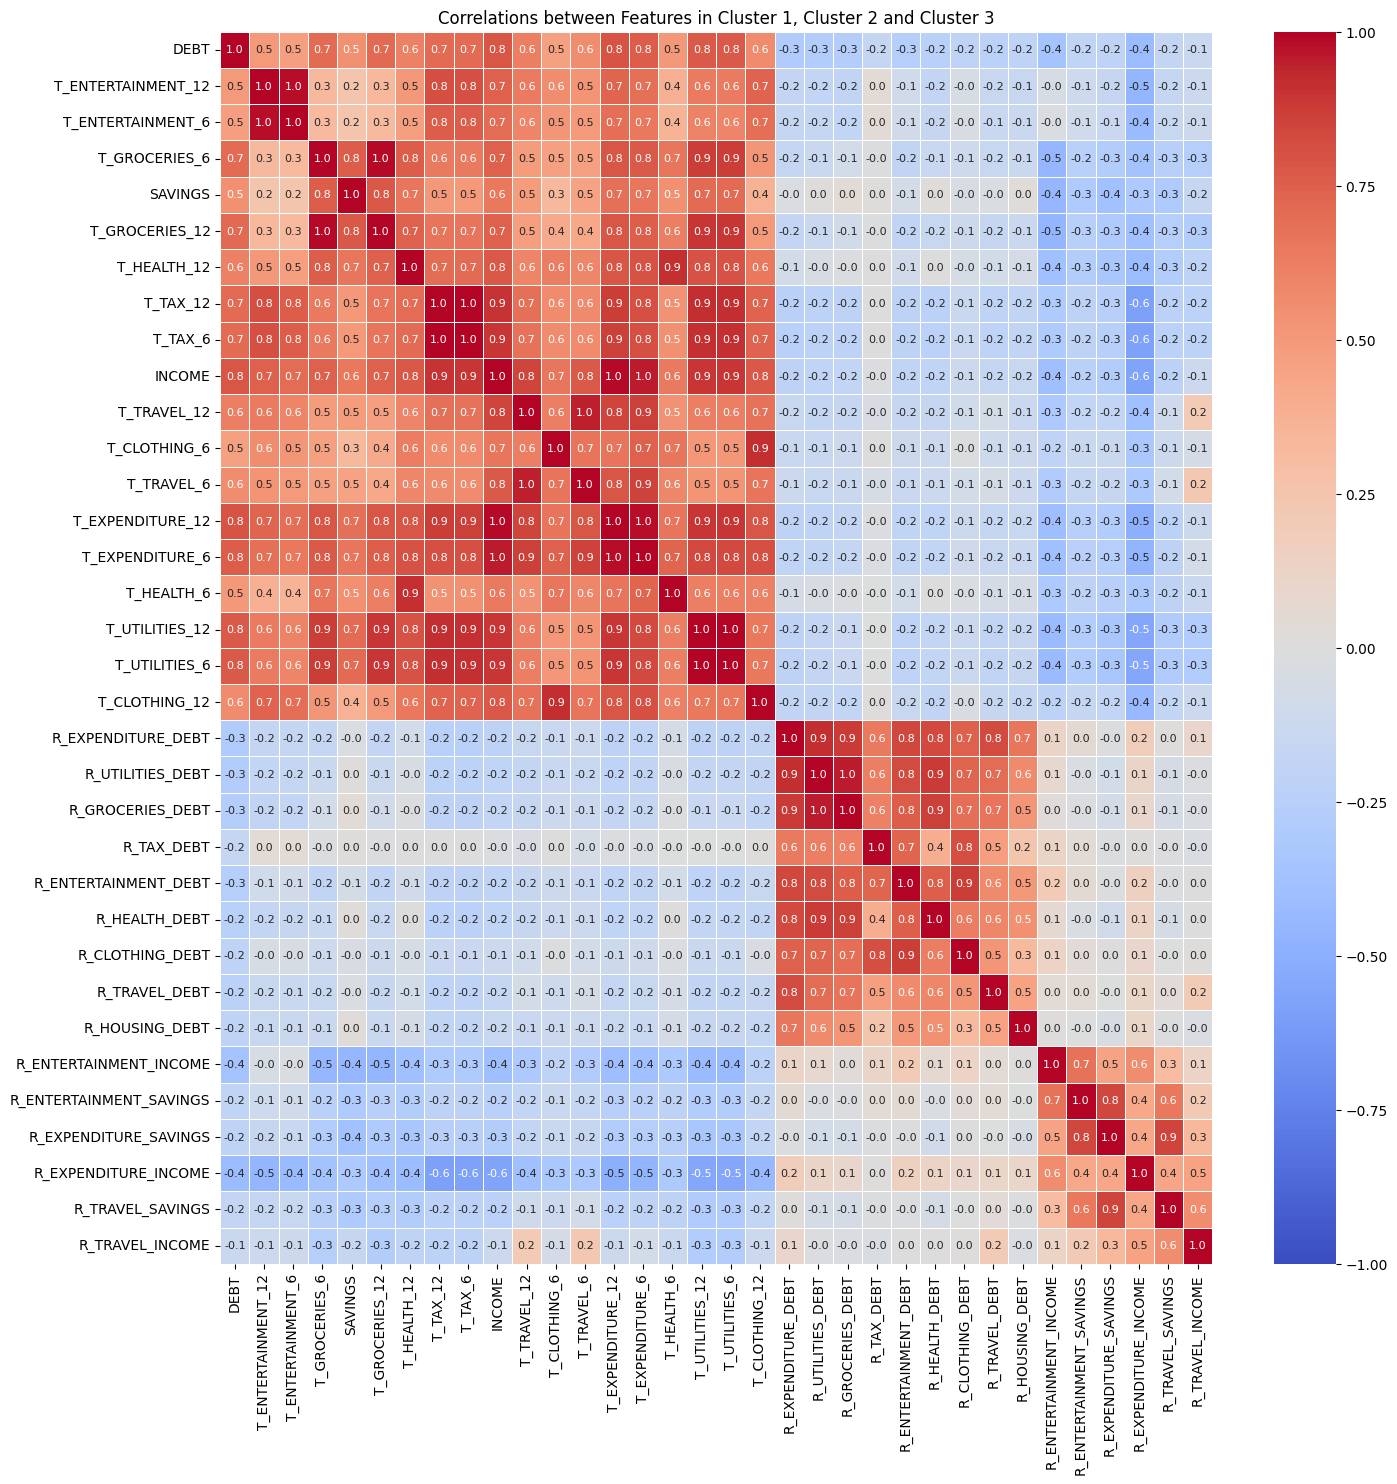

In [22]:
# Find correlations between features in cluster1, cluster 2 and cluster 3
corr = df[c1_features + c2_features + c3_features].corr()

# Plot
plt.figure(figsize=(16, 16)) 
sns.heatmap(corr, annot=True, fmt='.1f', annot_kws={"size": 8}, linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations between Features in Cluster 1, Cluster 2 and Cluster 3')

**Notice that there are two groups of features. The first 9 features are from cluster 2. These are all highly correlated. Similarly, the remaining 6 from cluster 3 are also all highly correlated. At the same time, we can see correlations between the features of different groups are not as strong.**

*This is exactly the point of feature clustering. We have created groups of features that will provide similar information about the target variable. At the same time, they will provide different information to features in the other groups. If we select 1 or 2 features from each cluster, we will reduce the amount of redundant features in our shortlist.*